##  SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Let's generate our dataset and take a look on it.

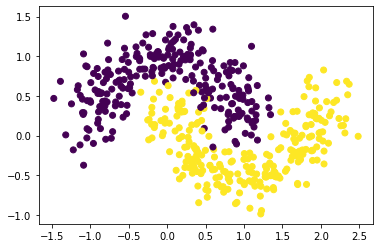

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

We will train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score

from mlxtend.plotting import plot_decision_regions

moons_points_train, moons_points_test, moons_labels_train, moons_labels_test = train_test_split(moons_points, moons_labels, test_size=0.35, random_state=88)

lr = LogisticRegression(random_state=33, solver='saga') 
svm = SVC(kernel='linear', gamma = 'auto') 
lr.fit(moons_points_train, moons_labels_train)
svm.fit(moons_points_train, moons_labels_train)
predict_lr = lr.predict(moons_points_test)
predict_svm = svm.predict(moons_points_test)

print("Accuracy for LR: ", accuracy_score(moons_labels_test, predict_lr))
print("Accuracy for SVM:", accuracy_score(moons_labels_test, predict_svm))

Accuracy for LR:  0.8285714285714286
Accuracy for SVM: 0.8285714285714286


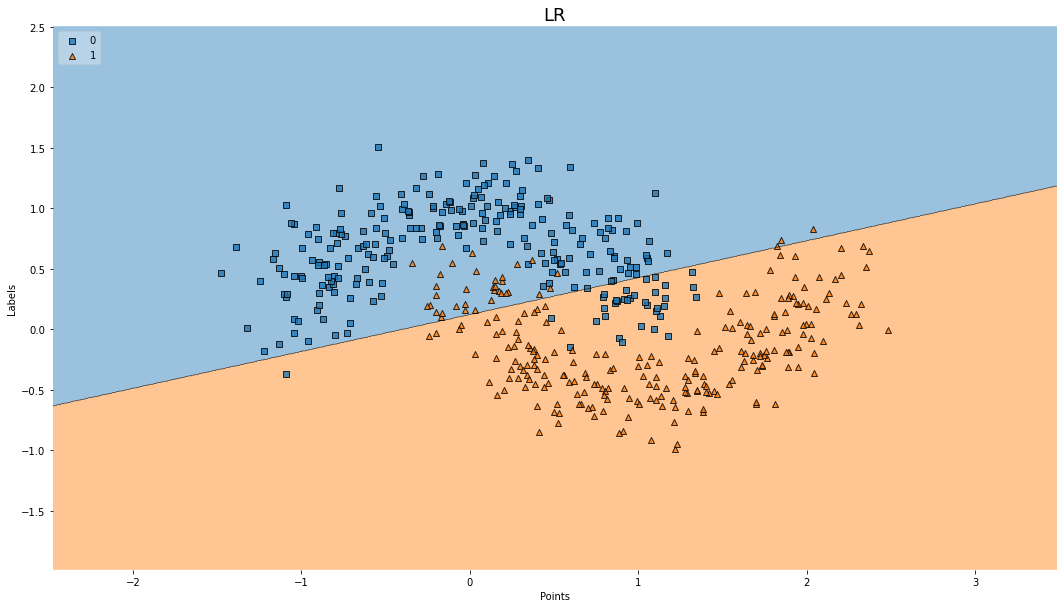

In [4]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=lr, 
                      legend=2)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('LR', size=18)
plt.show()

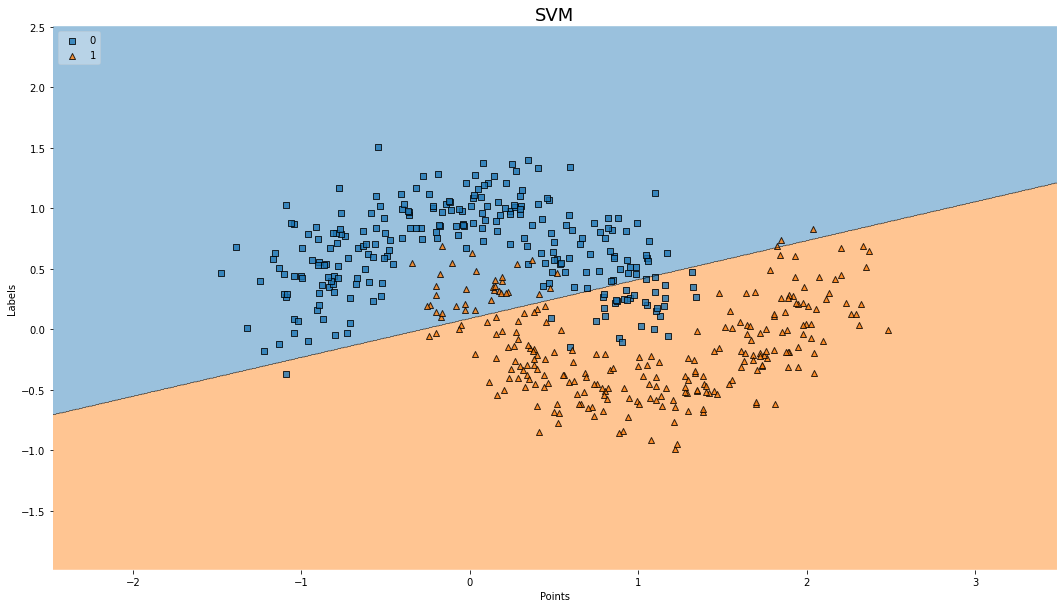

In [5]:
plt.figure(figsize=(18,10))
plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=svm, 
                      legend=2)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('SVM', size=18)
plt.show()

`SVC` and `LogisticRegression` is devided by a straight line, but as we can see, dependence is non linear.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel we will estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

How did decision border changed for kernel? 

I will show it on pictures.

In [6]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['poly', 'rbf', 'sigmoid'],'C':[0.1, 1, 10], 'gamma': np.arange( 0.0, 10.0, 0.1 )}

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(svm, parameters, scoring=scorer)
grid_fit = grid_obj.fit(moons_points, moons_labels)
best_clf = grid_fit.best_estimator_

best_clf.fit(moons_points, moons_labels)
predict_model = best_clf.predict(moons_points_test)
print("Best accuracy:", accuracy_score(moons_labels_test, predict_model))
tmp = grid_obj.best_params_
print(grid_obj)

Best accuracy: 0.9828571428571429
GridSearchCV(estimator=SVC(gamma='auto', kernel='linear'),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring=make_scorer(f1_score))


We can see, that rbf is modt accurate.

So we will plot it.

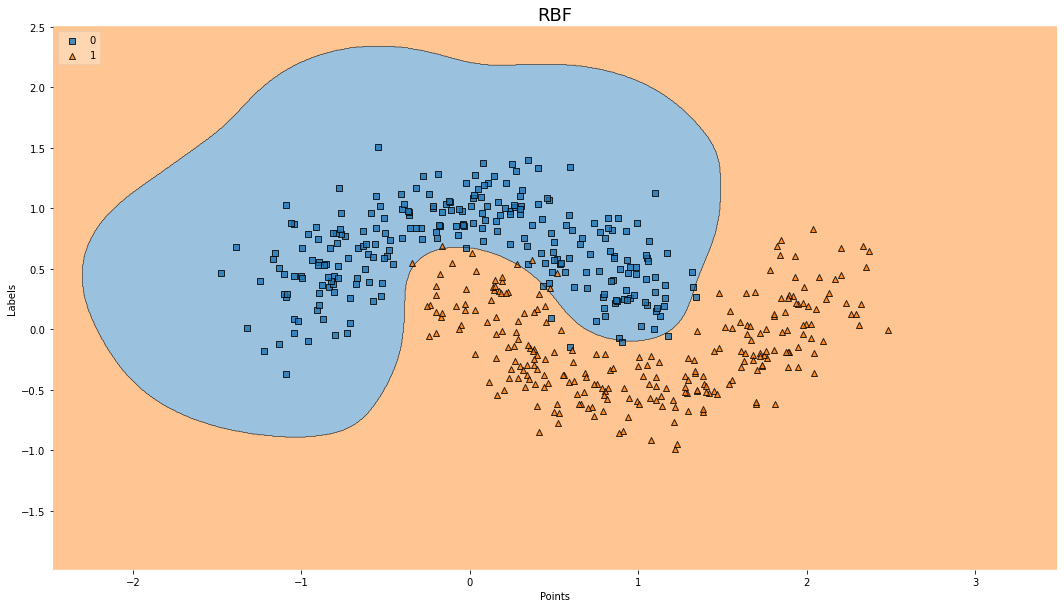

In [7]:
plt.figure(figsize=(18,10))

rbf = SVC(kernel = 'rbf', gamma = tmp['gamma'])
rbf.fit(moons_points_train, moons_labels_train)

plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=rbf, 
                      legend=2)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('RBF', size=18)
plt.show()

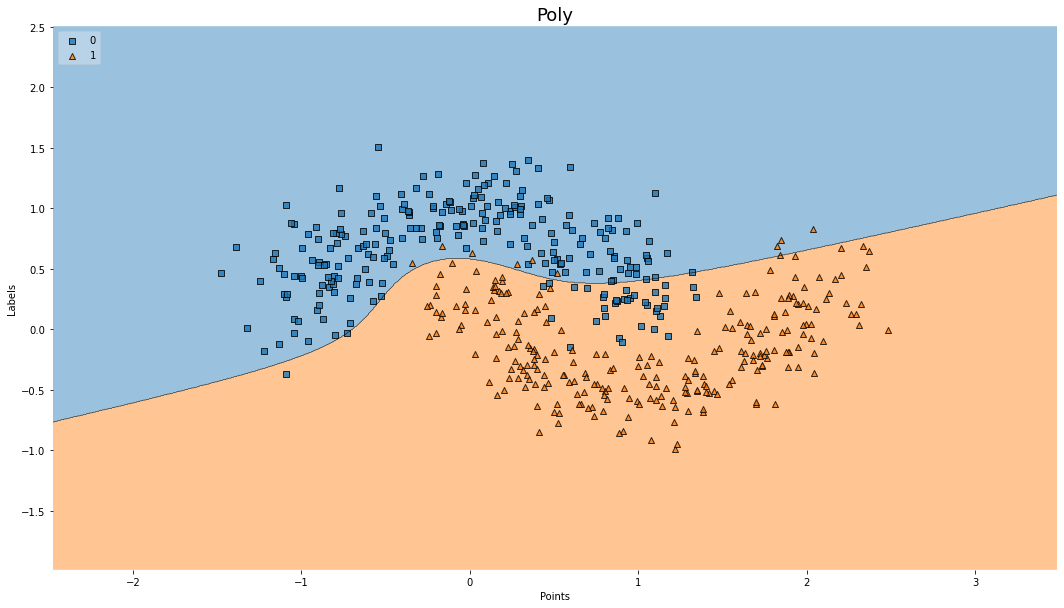

In [8]:
plt.figure(figsize=(18,10))

rbf = SVC(kernel = 'poly', gamma = tmp['gamma'])
rbf.fit(moons_points_train, moons_labels_train)

plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=rbf, 
                      legend=2)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('Poly', size=18)
plt.show()

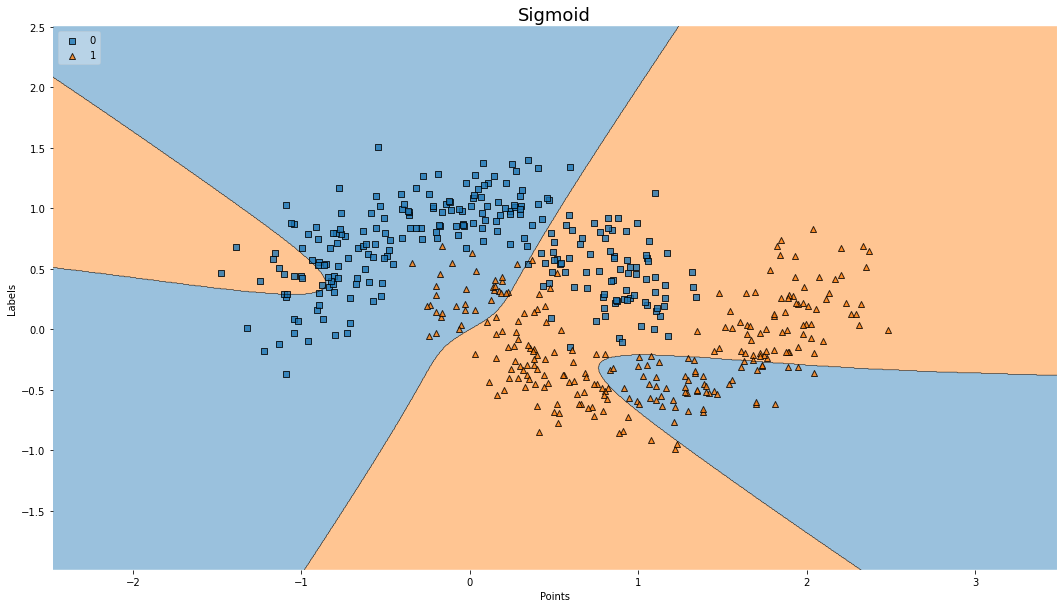

In [9]:
plt.figure(figsize=(18,10))

rbf = SVC(kernel = 'sigmoid', gamma = tmp['gamma'])
rbf.fit(moons_points_train, moons_labels_train)

plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=rbf, 
                      legend=2)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('Sigmoid', size=18)
plt.show()

I have chosen the RBF, because it is most accurate.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

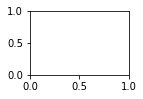

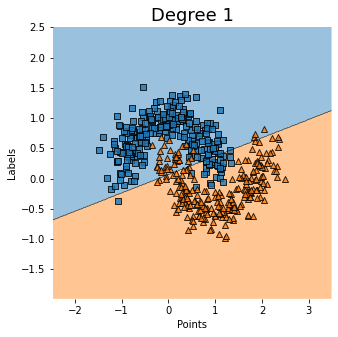

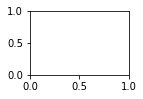

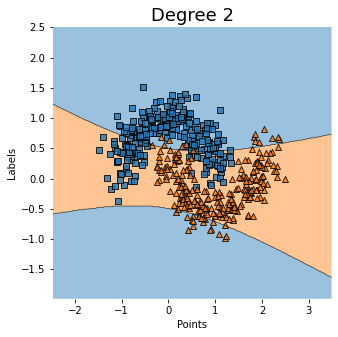

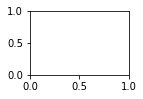

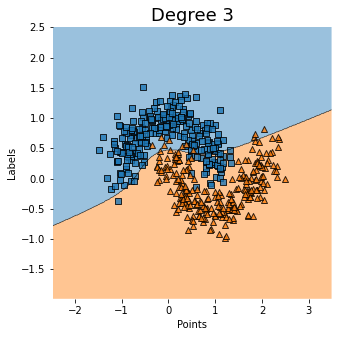

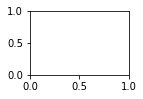

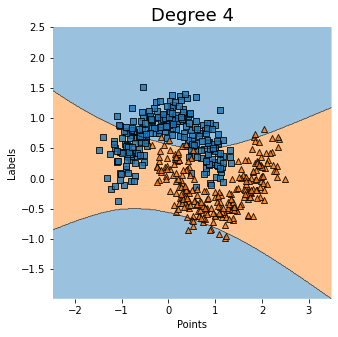

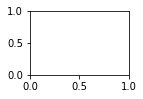

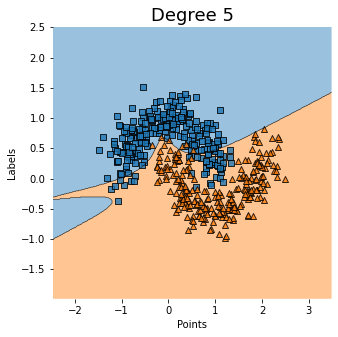

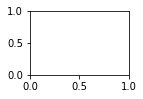

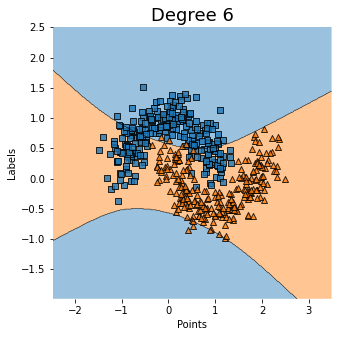

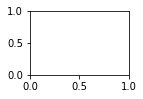

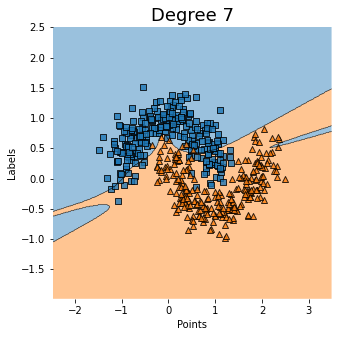

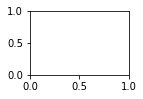

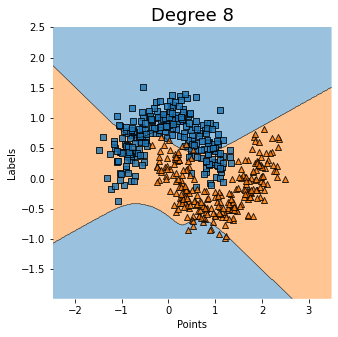

In [11]:
for i in range(1, 9):
    plt.subplot(3,3,i+1)
    plt.figure(figsize = (5,5))
    poly = SVC(kernel = 'poly', gamma = tmp['gamma'], degree = i)
    transform = poly.fit(moons_points, moons_labels)
    plot_decision_regions(moons_points, moons_labels, poly, legend=0)
    plt.xlabel('Points')
    plt.ylabel('Labels')
    plt.title('Degree ' + str(i), size=18)
    plt.show()

/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarni

The best score: 0.9210526315789473
degree: 3


/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


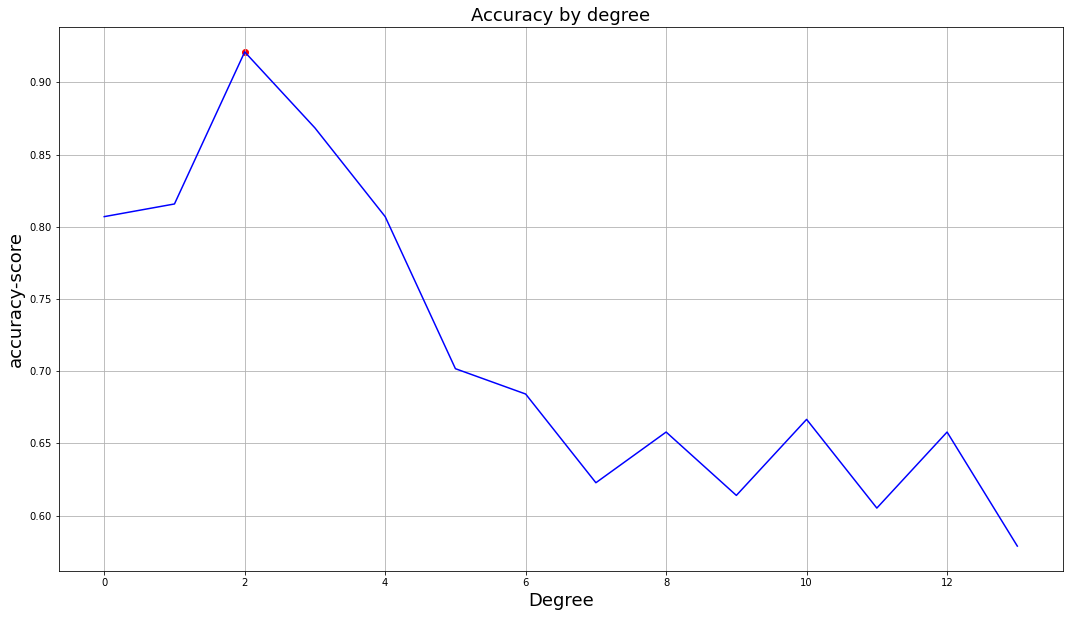

In [48]:
accuracy = []
for i in range(1, 15):
    poly = PolynomialFeatures(i)
    transform = poly.fit_transform(moons_points)
    
    transform_train, transform_test, moons_labels_train, moons_labels_test = train_test_split(transform, moons_labels, test_size=0.35, random_state=42)     
    transform_train, transform_valid, moons_labels_train, moons_labels_valid = train_test_split(transform_train, moons_labels_train, test_size=0.35, random_state=42)                                                                                   
    lr = LogisticRegression(random_state=0, solver='saga', multi_class='ovr')
    lr.fit(transform_train, moons_labels_train)
    pred_l = lr.predict(transform_valid)
    
    accuracy.append(accuracy_score(moons_labels_valid, pred_l))
     
plt.figure(figsize=(18,10))
plt.plot(accuracy, color = 'blue');
plt.grid()
plt.scatter(accuracy.index(max(accuracy)), max(accuracy), color = 'red', marker='o')

plt.xlabel('Degree', size = 18)
plt.ylabel('accuracy-score', size = 18)
plt.title('Accuracy by degree', size=18)

print('The best score: {}\ndegree: {}'.format(max(accuracy), accuracy.index(max(accuracy)) + 1))

We can see what, the best f1-score we can get is `PolynomialFeatures(3)`

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

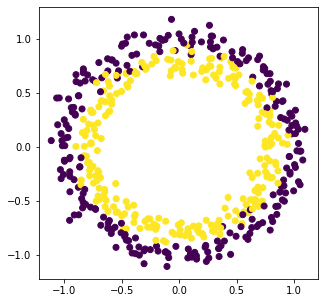

In [13]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

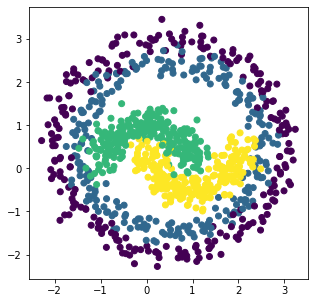

In [62]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

In [63]:
points_train, points_test, labels_train, labels_test = train_test_split(points, labels, test_size=0.35, random_state=88)

In [64]:
lr = LogisticRegression(random_state=88, solver='saga')
svm = SVC(kernel='linear', C = 10)
svm.fit(points_train, labels_train)
lr.fit(points_train, labels_train)
predict_lr = lr.predict(points_test)
predict_svm = svm.predict(points_test)

print("Accuracy LR:", accuracy_score(labels_test, predict_lr))
print("Accuracy SVM linear:", accuracy_score(labels_test, predict_svm))

Accuracy LR: 0.35714285714285715
Accuracy SVM linear: 0.48857142857142855


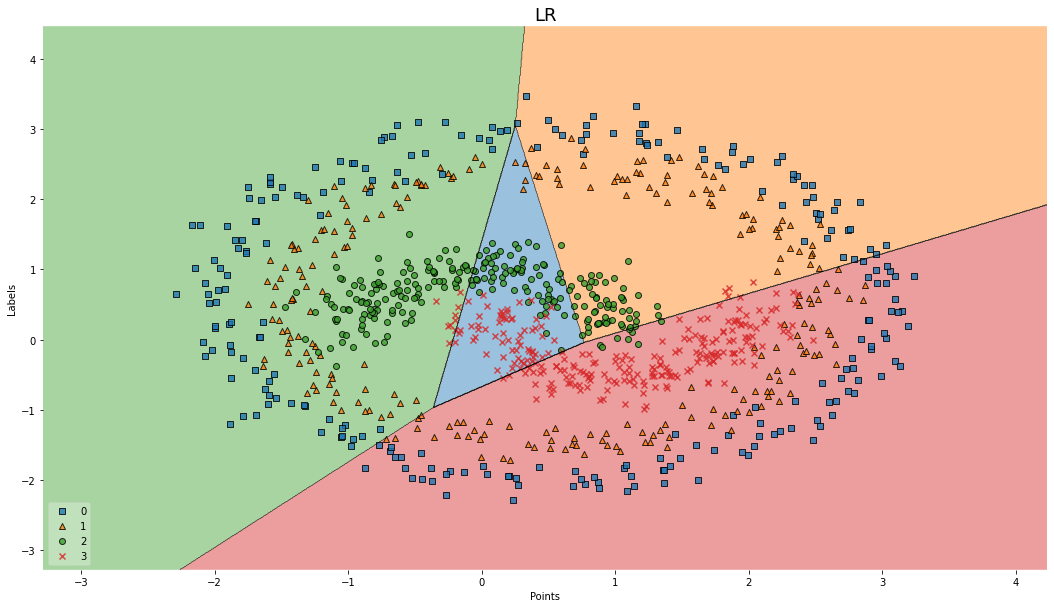

In [65]:
plt.figure(figsize=(18,10))
plot_decision_regions(points, 
                      labels,
                      clf=lr, 
                      legend=3)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('LR', size=18)
plt.show()

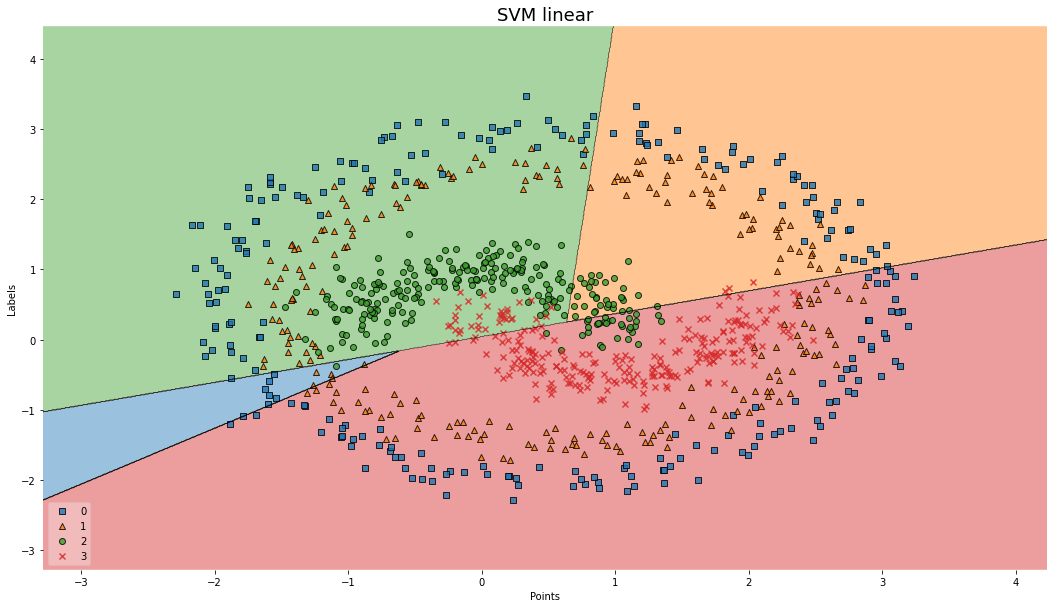

In [66]:
plt.figure(figsize=(18,10))
plot_decision_regions(points, 
                      labels,
                      clf=svm, 
                      legend=3)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('SVM linear', size=18)
plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Accuracy RBF: 0.92


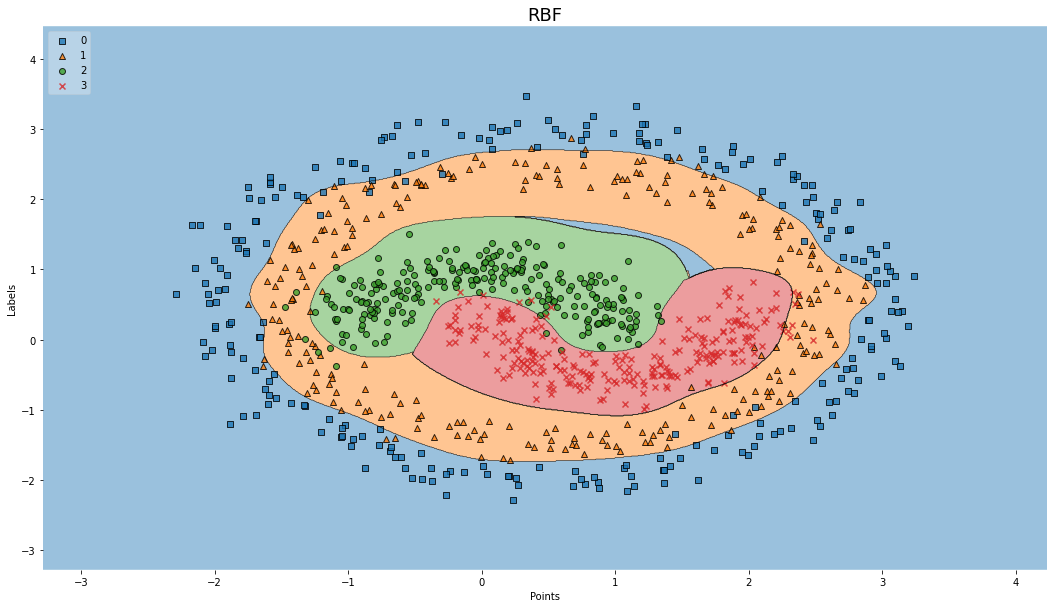

In [67]:
plt.figure(figsize=(18,10))

rbf = SVC(kernel = 'rbf', gamma = tmp['gamma'])
rbf.fit(points_train, labels_train)

predict_rbf = rbf.predict(points_test)
print("Accuracy RBF:", accuracy_score(labels_test, predict_rbf))

plot_decision_regions(points, 
                      labels,
                      clf=rbf, 
                      legend=2)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('RBF', size=18)
plt.show()

/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarni

/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarni

The best score: 0.7850877192982456
degree: 2


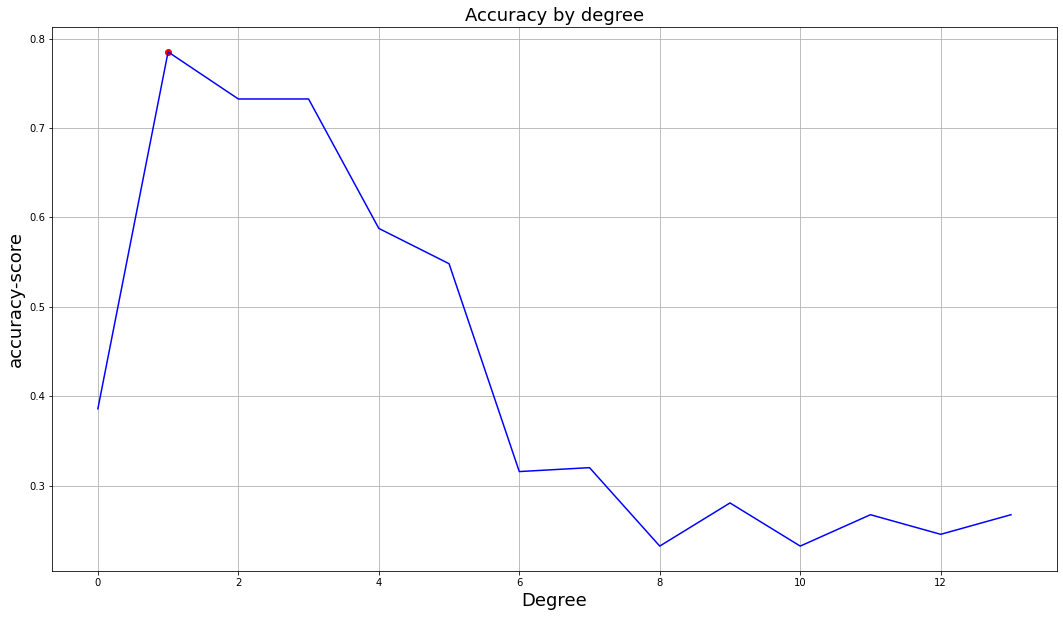

In [68]:
accuracy = []
for i in range(1, 15):
    poly = PolynomialFeatures(i)
    transform = poly.fit_transform(points)
    
    transform_train, transform_test, labels_train, labels_test = train_test_split(transform, labels, test_size=0.35, random_state=88)     
    transform_train, transform_valid, labels_train, labels_valid = train_test_split(transform_train, labels_train, test_size=0.35, random_state=88)                                                                                   
    lr = LogisticRegression(random_state=88, solver='saga', multi_class='ovr')
    lr.fit(transform_train, labels_train)
    pred_l = lr.predict(transform_valid)
    
    accuracy.append(accuracy_score(labels_valid, pred_l))
     
plt.figure(figsize=(18,10))
plt.plot(accuracy, color = 'blue');
plt.grid()
plt.scatter(accuracy.index(max(accuracy)), max(accuracy), color = 'red', marker='o')

plt.xlabel('Degree', size = 18)
plt.ylabel('accuracy-score', size = 18)
plt.title('Accuracy by degree', size=18)

print('The best score: {}\ndegree: {}'.format(max(accuracy), accuracy.index(max(accuracy)) + 1))

/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/bakhtiyar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy LR: 0.7850877192982456


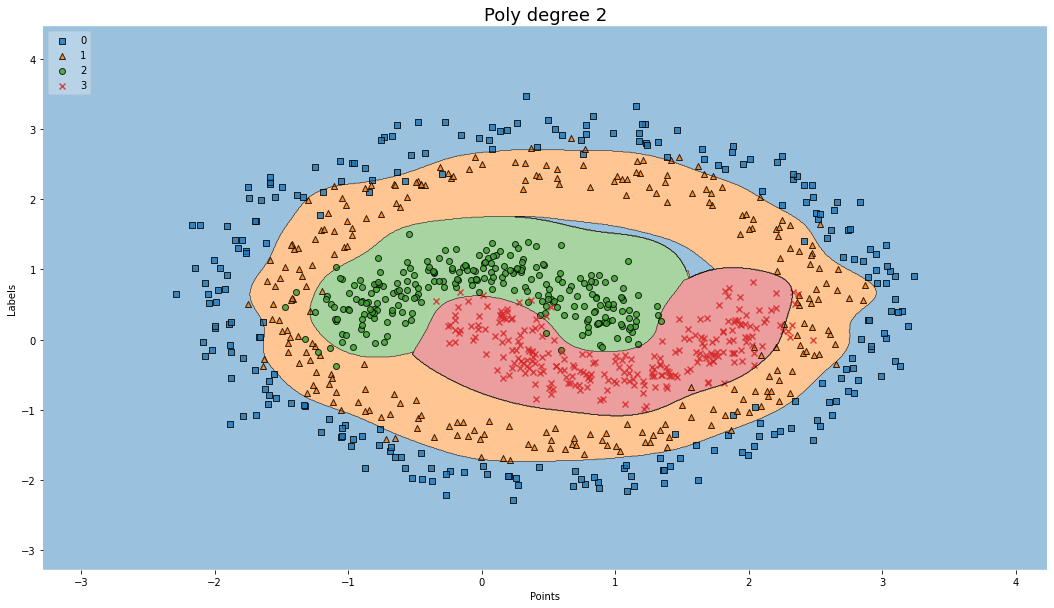

In [71]:
poly = PolynomialFeatures(2)
transform = poly.fit_transform(points)
    
transform_train, transform_test, labels_train, labels_test = train_test_split(transform, labels, test_size=0.35, random_state=88)     
transform_train, transform_valid, labels_train, labels_valid = train_test_split(transform_train, labels_train, test_size=0.35, random_state=88)                                                                                   
lr = LogisticRegression(random_state=88, solver='saga', multi_class='ovr')
lr.fit(transform_train, labels_train)
pred_l = lr.predict(transform_valid)
print("Accuracy LR:", accuracy_score(labels_valid, pred_l))

plt.figure(figsize=(18,10))
plot_decision_regions(points, 
                      labels,
                      clf=rbf, 
                      legend=2)
plt.xlabel('Points')
plt.ylabel('Labels')
plt.title('Poly degree 2', size=18)
plt.show()

As we can see, we are gettung best scores on `SVC RBF`.